In [1]:
import sys, os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

path_data = '/home/lemasle/PROJECTS/UCI_electricity_consumption/data/UC_Irvine_ML_repository/'
path_src = Path('./src')
sys.path.append(os.path.abspath(path_src))
path_figs = Path('./figs')

In [3]:
cm = 1/2.54

In [4]:
import chunk_features
import ts_clustering
import files_io

## Import the training data (data have been grouped by 15-min chunks)
## We select randomly 5000 chunks

In [5]:
train = pd.read_hdf(Path(path_data) / 'UCI_15min_chunks_2010.h5')

In [6]:
train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,chunk_index
0,1.790,0.236,240.65,7.4,0.0,0.0,18.0,0
1,1.780,0.234,240.07,7.4,0.0,0.0,18.0,0
2,1.780,0.234,240.15,7.4,0.0,0.0,19.0,0
3,1.746,0.186,240.26,7.2,0.0,0.0,18.0,0
4,1.686,0.102,240.12,7.0,0.0,0.0,18.0,0
...,...,...,...,...,...,...,...,...
1425055,0.946,0.000,239.74,4.0,0.0,0.0,0.0,95003
1425056,0.942,0.000,239.41,4.0,0.0,0.0,0.0,95003
1425057,0.946,0.000,240.33,4.0,0.0,0.0,0.0,95003
1425058,0.946,0.000,240.43,4.0,0.0,0.0,0.0,95003


In [7]:
n_samples = 5000
list_n_clusters = [5, 10, 20, 30, 40, 50, 60, 70, 80]

In [8]:
seed = 3
np.random.seed(seed)

## Search an adequate number of clusters using the silhouette score

In [9]:
list_scores = ts_clustering.search_cluster_number(train, 'Global_active_power', n_samples, list_n_clusters, seed)

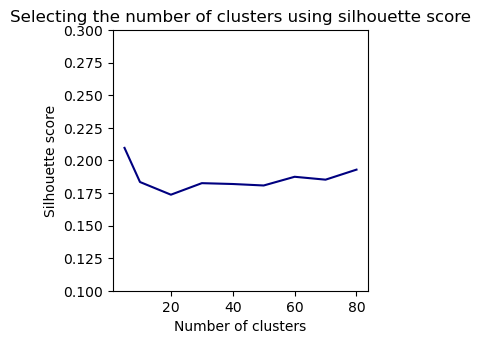

In [10]:
ts_clustering.plot_silhouette_scores(list_n_clusters, list_scores, path_figs, 'UCI_silhouette_score.pdf', cm)

## We group 15-min timeseries using 60 clusters

#### The method requires the timeseries to be scaled, which implies that differenes in amplitudes are not considered for grouping

In [11]:
n_clust = 60

In [12]:
X_scaled, chunks_id = ts_clustering.prepare_input_data(train, 'Global_active_power', n_samples, seed = seed)

In [13]:
y, clusters = ts_clustering.timeseries_clustering(X_scaled, n_clust, verbose=False, seed=seed)

In [14]:
temp = ts_clustering.get_original_chunk_data(train, chunks_id)

In [15]:
match_chunk_cluster = ts_clustering.create_chunk_dictionnary(chunks_id, clusters.labels_)

## Visualization of the timeseries grouped by clusters 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


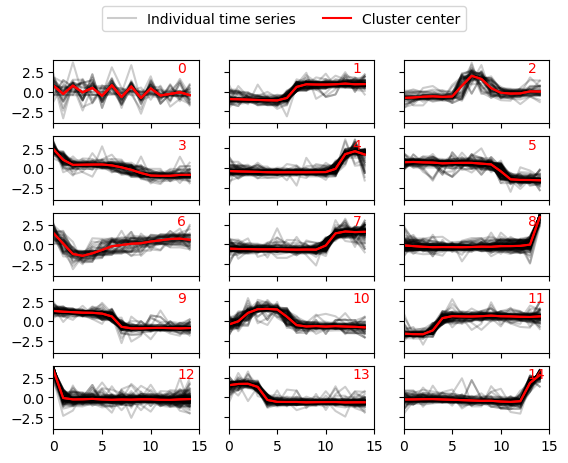

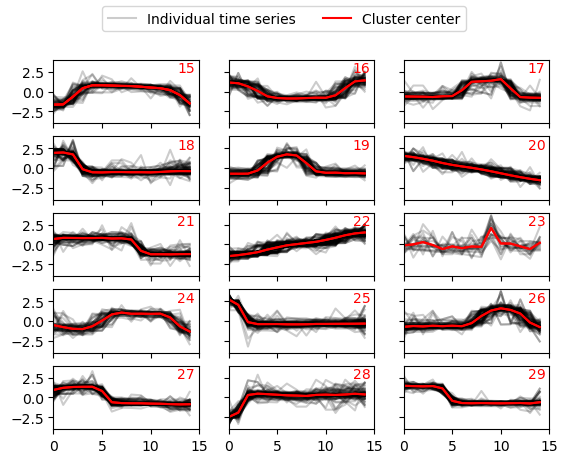

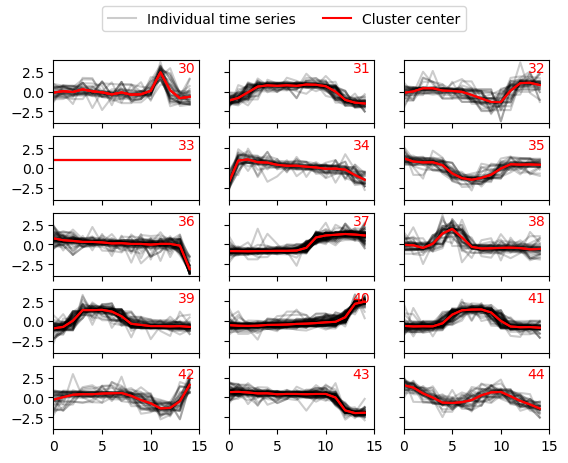

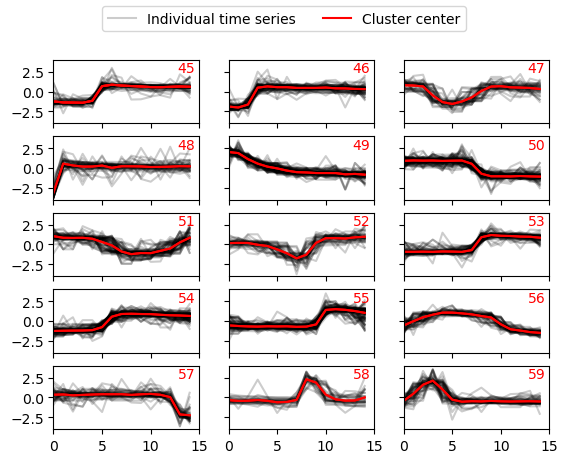

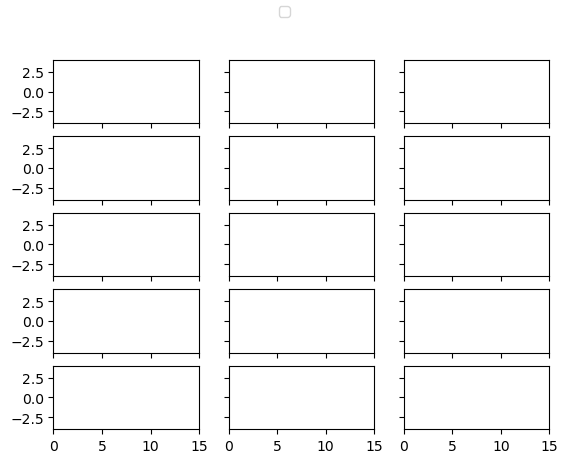

In [16]:
ts_clustering.multiplot_multipages(X_scaled, y, clusters, n_clust, nrows=5, ncols=3, xlabel= '', ylabel='', path=path_figs, \
                     filename='multiplot.pdf',cm=cm)

In [17]:
sil_score = ts_clustering.compute_silhouette_score(X_scaled, clusters.labels_)

In [18]:
sil_samp = ts_clustering.compute_silhouette_samples(X_scaled, clusters.labels_)

In [19]:
match_cluster_silscore = ts_clustering.create_silhouette_score_dictionnary(chunks_id, sil_samp)

## Visualization of the silhouette score for individual clusters

#### The selected number of clusters (60) seems appropriate since the silhouette score for individual clusters is in most cases larger than the global silhouette score

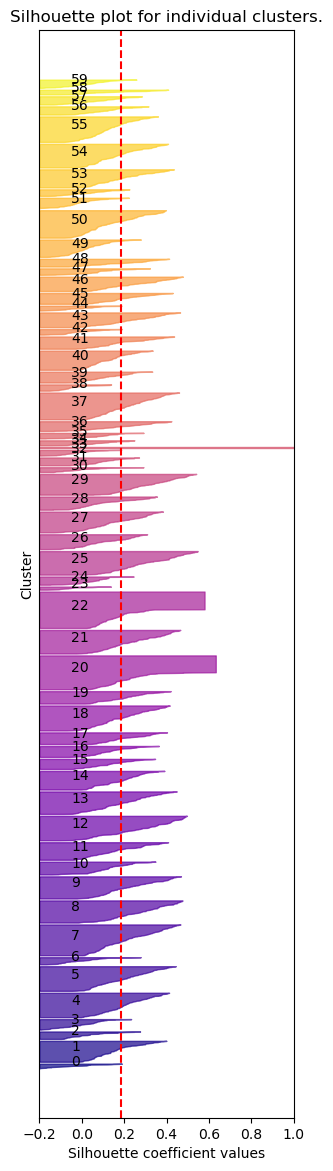

In [20]:
ts_clustering.plot_silhouette_score_for_samples(sil_score, sil_samp, -0.2, clusters.labels_, n_clust, path_figs, 'UCI_silhouette_plot.pdf', cm)

In [21]:
final = ts_clustering.add_clust_prop(temp, match_chunk_cluster, match_cluster_silscore)

## Save data (including clusters labels and silhouette scores)

In [23]:
files_io.save_h5_file(final, 'tsclustering', path_data, 'UCI_timeseries_clustering.hdf')

In [24]:
final.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,chunk_index,cluster,silhouette_score
570,0.664,0.146,241.91,2.8,0.0,0.0,1.0,114,44,0.187611
571,0.660,0.144,241.33,2.8,0.0,0.0,1.0,114,44,0.187611
572,0.656,0.142,240.87,2.8,0.0,0.0,0.0,114,44,0.187611
573,0.654,0.142,240.98,2.8,0.0,0.0,1.0,114,44,0.187611
574,0.654,0.144,241.12,2.8,0.0,0.0,1.0,114,44,0.187611
